# Initialize


In [5]:
# What version of Python do you have?
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.11.0
Keras Version: 2.11.0

Python 3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]
Pandas 1.5.1
Scikit-Learn 1.1.3
GPU is NOT AVAILABLE


# Load Data

In [10]:
df = pd.read_csv('../Data/cleaned.csv')

y = df.pop('median_house_value')

X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

# Define and Compile Model

In [103]:
model = tf.keras.Sequential([
    # Add a fully connected layer with 32 output nodes
    tf.keras.layers.Dense(32, activation='relu'),
    # Add a fully connected layer with 32 output nodes
    tf.keras.layers.Dense(32, activation='relu'),
    # Add a fully connected layer with 1 output node (the final guess)
    tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam',
              loss='mean_absolute_error')

In [104]:
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
516/516 [==============================] - 2s 2ms/step - loss: 0.4297
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3659
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3525
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3451
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3393
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3353
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3329
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3292
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3267
Epoch 10/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3230
Epoch 11/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3213
Epoch 12/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3202
Epoch 13/100


# Evaluate Performance

In [105]:
test_results = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.2855


In [106]:
test_predictions = model.predict(X_test).flatten()

129/129 [==============================] - 0s 2ms/step


In [107]:
len(X_train)

16512

Text(0, 0.5, 'Predictions [Value]')

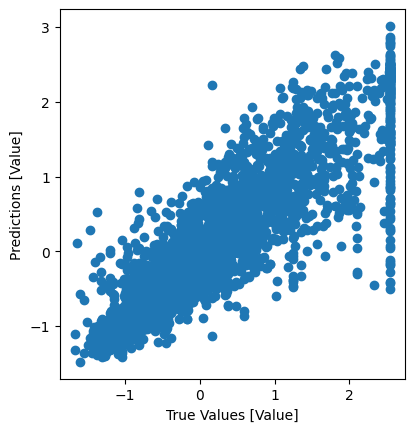

In [108]:
from matplotlib import pyplot as plt


plot = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Value]')
plt.ylabel('Predictions [Value]')